In [40]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [41]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [42]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [44]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [45]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.511361023729444, 0.5201198653735675],
 'diameter': 44.810795107328126,
 'confidence': 0.8393877744674683,
 'timestamp': -544854.251809,
 'sphere': {'center': [5.840070084606424,
   1.621262738222258,
   38.54400230944424],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [138.70483565581165, 107.81375780703735],
  'axes': [182.63952092965576, 182.63952092965576],
  'angle': 0.0},
 'circle_3d': {'center': [0.5154544331680748,
   -0.2918162041265038,
   29.826858446641495],
  'normal': [-0.5123613799482042, -0.18408610705767703, -0.8388075592923094],
  'radius': 2.0944395661397603},
 'diameter_3d': 4.188879132279521,
 'ellipse': {'center': [98.18131655605325, 92.13698584827506],
  'axes': [39.23616090243258, 44.810795107328126],
  'angle': 21.121876610189844},
 'location': [98.18131655605325, 92.13698584827506],
 'model_confidence': 1.0,
 'theta': 1.7559383252047862,
 'phi': -2.119134568

Text(0.5, 0, 'Pupil timestamp (s)')

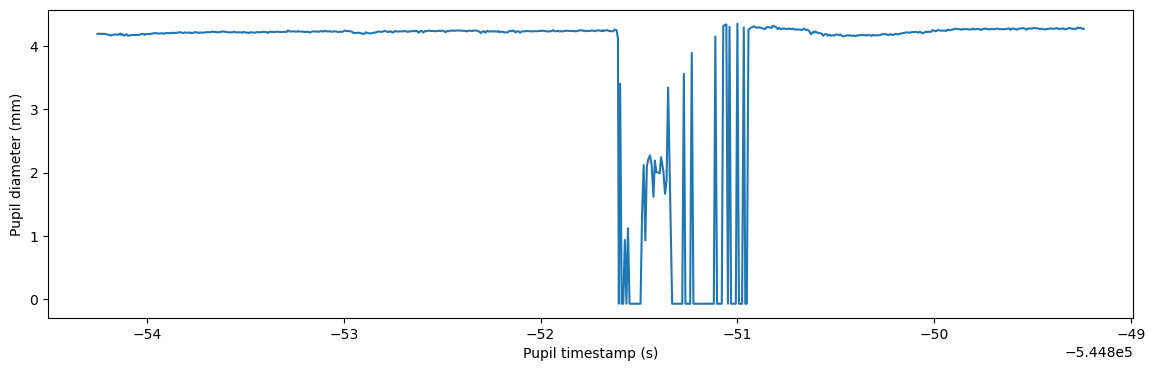

In [46]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')